# Inventory of discrete distributions

This notebook contains all the figure generation code for [Section 2.3 Inventory of discrete distributions]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
# RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
RCPARAMS.update({"figure.figsize": (7,5)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)


%config InlineBackend.figure_format = 'retina'


DESTDIR = "figures/prob/probpanels"  # where to save figures

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
from ministats.utils import savefigure
from ministats import generate_pmf_panel
from ministats import plot_pmf
from ministats import plot_cdf

Saved figure to figures/prob/discreteinventory/prob_models_discrete_examples_panel.pdf
Saved figure to figures/prob/discreteinventory/prob_models_discrete_examples_panel.png


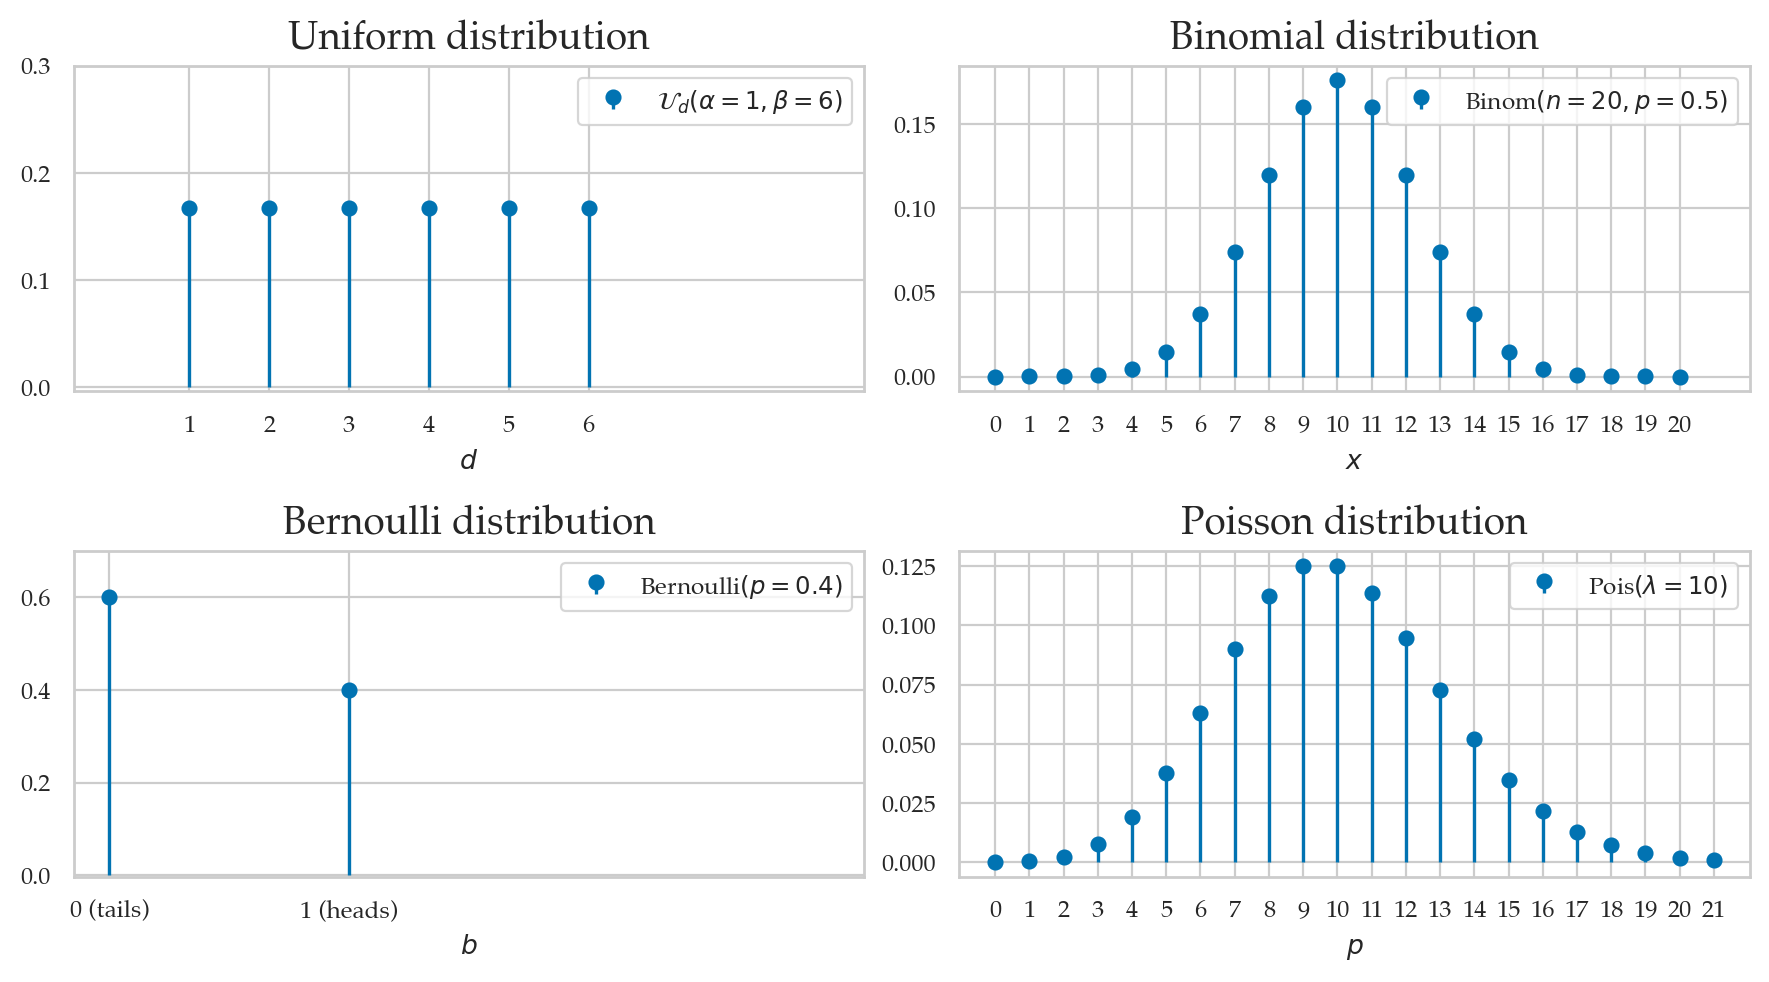

In [43]:
from scipy.stats import randint
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson


from ministats import plot_pmf

with plt.rc_context({"figure.figsize":(9,5)}):
    fig, axs = plt.subplots(2,2) # ,sharex=True)

    # randint
    ax = axs[0,0]
    rvR = randint(1, 6+1)
    plot_pmf(rvR, xlims=[0,10], ylims=[-0.004,0.3], ax=ax, label=r"$\mathcal{U}_d(\alpha=1,\beta=6)$")
    ax.set_xlabel("$d$")
    ax.set_xticks([1,2,3,4,5,6])
    ax.set_ylabel("")
    ax.set_title("Uniform distribution", fontdict={"size":14})

    # bernoulli
    ax = axs[1,0]
    rvN = bernoulli(0.4)
    plot_pmf(rvN, xlims=[0,4], ylims=[-0.004,0.7], ax=ax, label="Bernoulli$(p=0.4)$")
    ax.set_xlabel("$b$")
    ax.set_xticks([0,1])
    ax.set_xticklabels(["0 (tails)","1 (heads)"])
    ax.set_ylabel("")
    ax.set_title("Bernoulli distribution", fontdict={"size":14})

    # binom
    ax = axs[0,1]
    rvB = binom(20, 0.5)
    plot_pmf(rvB, xlims=[0,22], ax=ax, label="Binom$(n=20,p=0.5)$")
    ax.set_xlabel("$x$")
    ax.set_xticks(range(0,20+1))
    ax.set_ylabel("")
    ax.set_title("Binomial distribution", fontdict={"size":14})

    # poisson
    ax = axs[1,1]
    lam = 10
    rvP = poisson(lam)
    plot_pmf(rvP, xlims=[0,22], ax=ax, label=r"Pois$(\lambda=10)$")
    ax.set_xlabel("$p$")
    ax.set_ylabel("")
    ax.set_title("Poisson distribution", fontdict={"size":14})

    filename = os.path.join(DESTDIR, "prob_models_discrete_examples_panel.pdf")
    savefigure(fig, filename)

## Definitions

## Math prerequisites

## Discrete distributions reference

### Discrete uniform

In [6]:
# import the model family
from scipy.stats import randint

# choose parameters
alpha = 1  # start at
beta = 4   # stop at

# create the rv object
rvU = randint(alpha, beta+1)

Saved figure to figures/prob/probpanels/randint_panel.pdf
Saved figure to figures/prob/probpanels/randint_panel.png


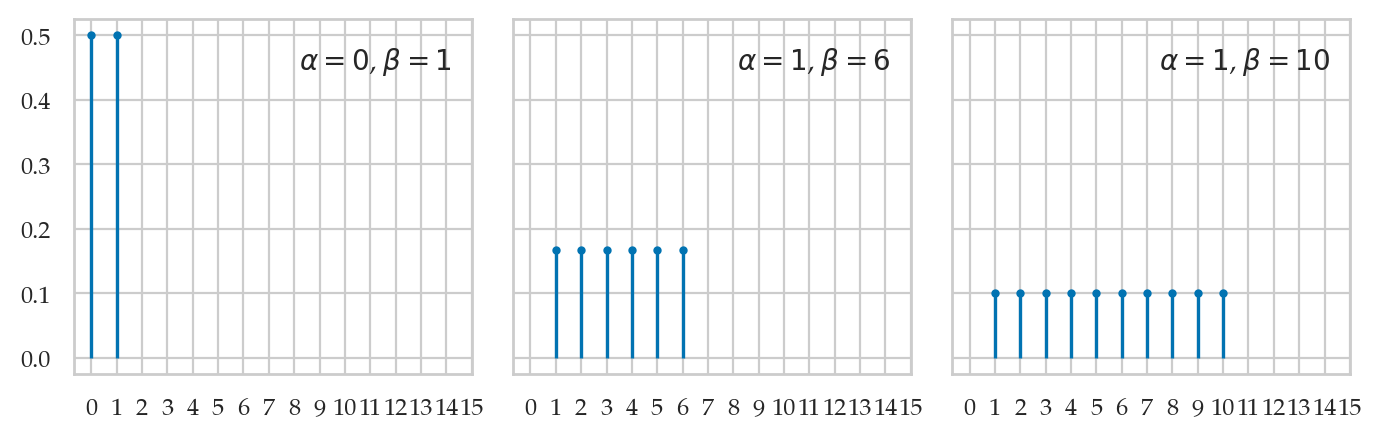

In [7]:
from scipy.stats import randint

xmax = 15
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 1)

# parameter dicts (list of lists)
params_matrix = [
    [dict(low=0,high=1+1),    dict(low=1,high=6+1),    dict(low=1,high=10+1)],
]

params_to_latex = {
    "low": "\\alpha",
    "high": "\\beta",
}

with plt.rc_context({"figure.figsize":(7,2.3)}):
    filename = os.path.join(DESTDIR, "randint_panel.pdf")
    generate_pmf_panel(filename,
                       xs, randint, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks);

### Bernoulli

In [8]:
from scipy.stats import bernoulli

rvB = bernoulli(p=0.3)

Saved figure to figures/prob/probpanels/bernoulli_panel.pdf
Saved figure to figures/prob/probpanels/bernoulli_panel.png


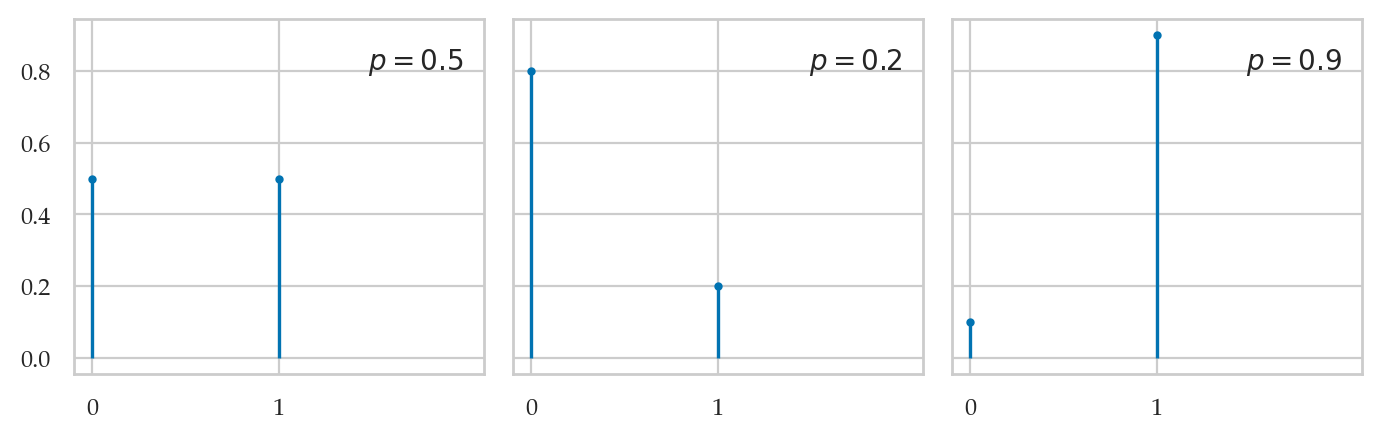

In [9]:
from scipy.stats import bernoulli

xmax = 3
xs = np.arange(0, xmax)
xticks = [0,1]


# parameter dicts (list of lists)
params_matrix = [
    [dict(p=0.5),  dict(p=0.2),  dict(p=0.9)],
]


with plt.rc_context({"figure.figsize":(7,2.3)}):
    filename = os.path.join(DESTDIR, "bernoulli_panel.pdf")
    generate_pmf_panel(filename,
                       xs, bernoulli, params_matrix,
                       params_to_latex=params_to_latex,
                       xticks=xticks);

### Binomial

We'll use the name `rvX` because `rvB` was already used for the Bernoulli random variable above.

In [10]:
from scipy.stats import binom

n = 20
p = 0.14
rvX = binom(n,p)

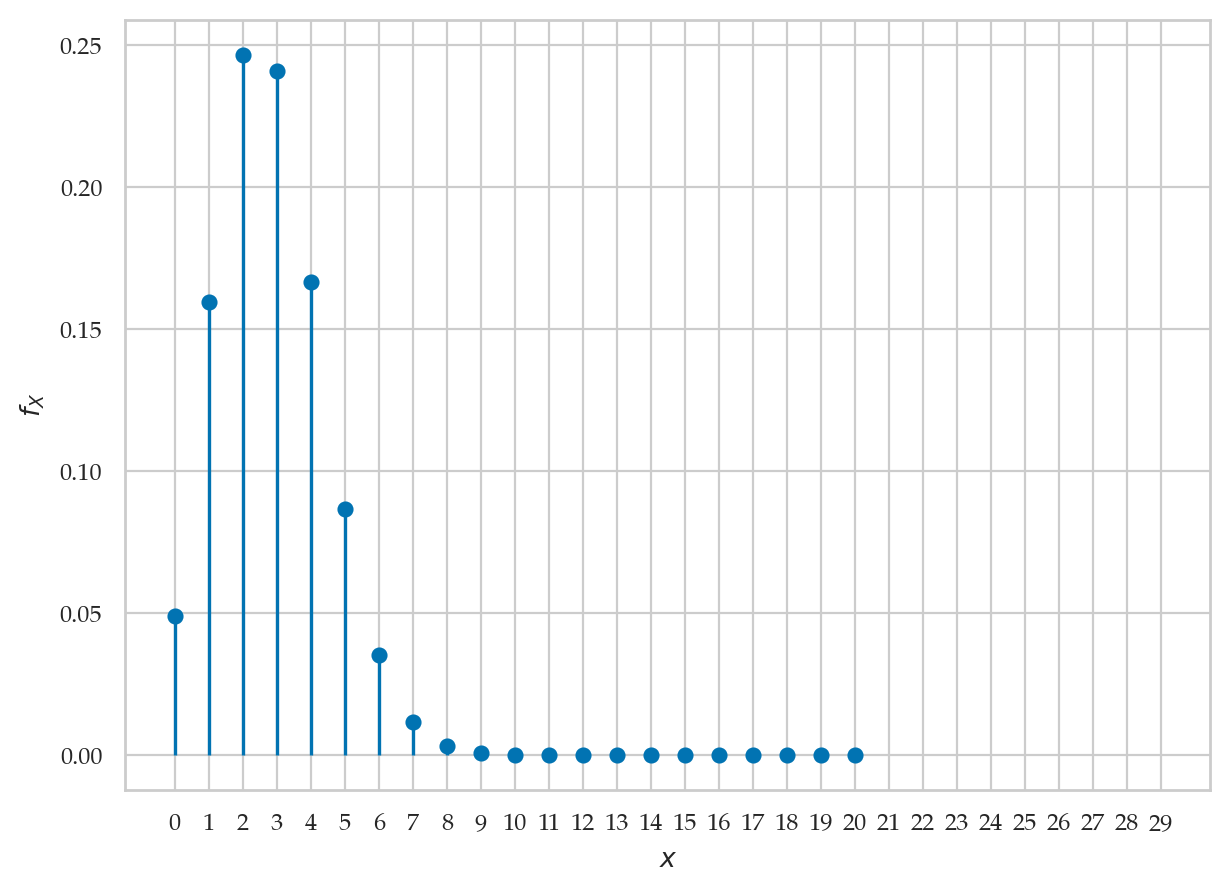

In [11]:
plot_pmf(rvX, xlims=[0,30]);

Saved figure to figures/prob/probpanels/binomial_panel.pdf
Saved figure to figures/prob/probpanels/binomial_panel.png


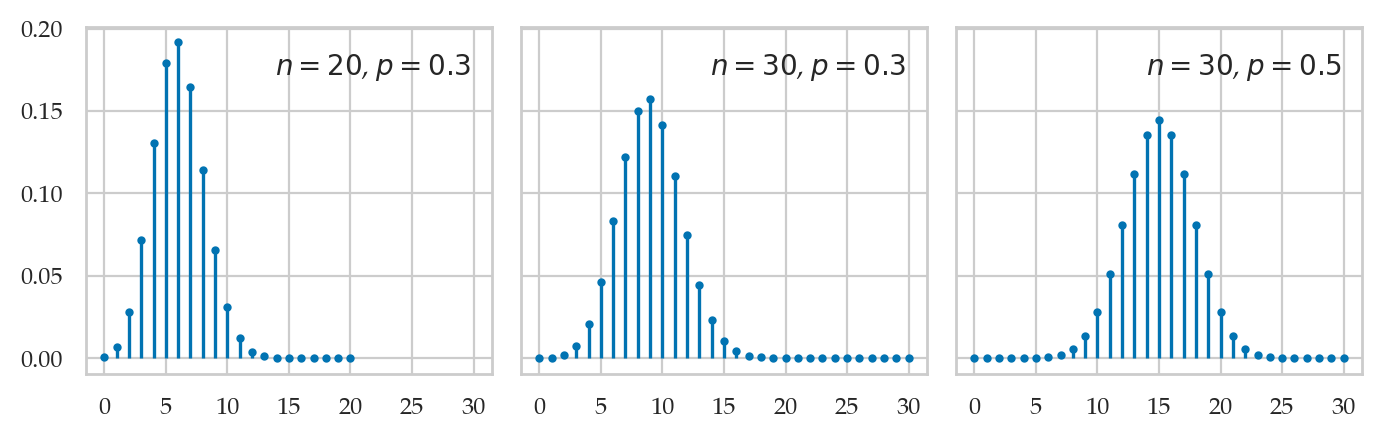

In [12]:
from scipy.stats import binom

xmax = 30
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(n=20, p=0.3),  dict(n=30, p=0.3),  dict(n=30, p=0.5)],
]

with plt.rc_context({"figure.figsize":(7,2.3)}):
    filename = os.path.join(DESTDIR, "binomial_panel.pdf")
    generate_pmf_panel(filename, xs, binom, params_matrix, xticks=xticks);

### Poisson


In [13]:
from scipy.stats import poisson
lam = 10
rvP = poisson(lam)

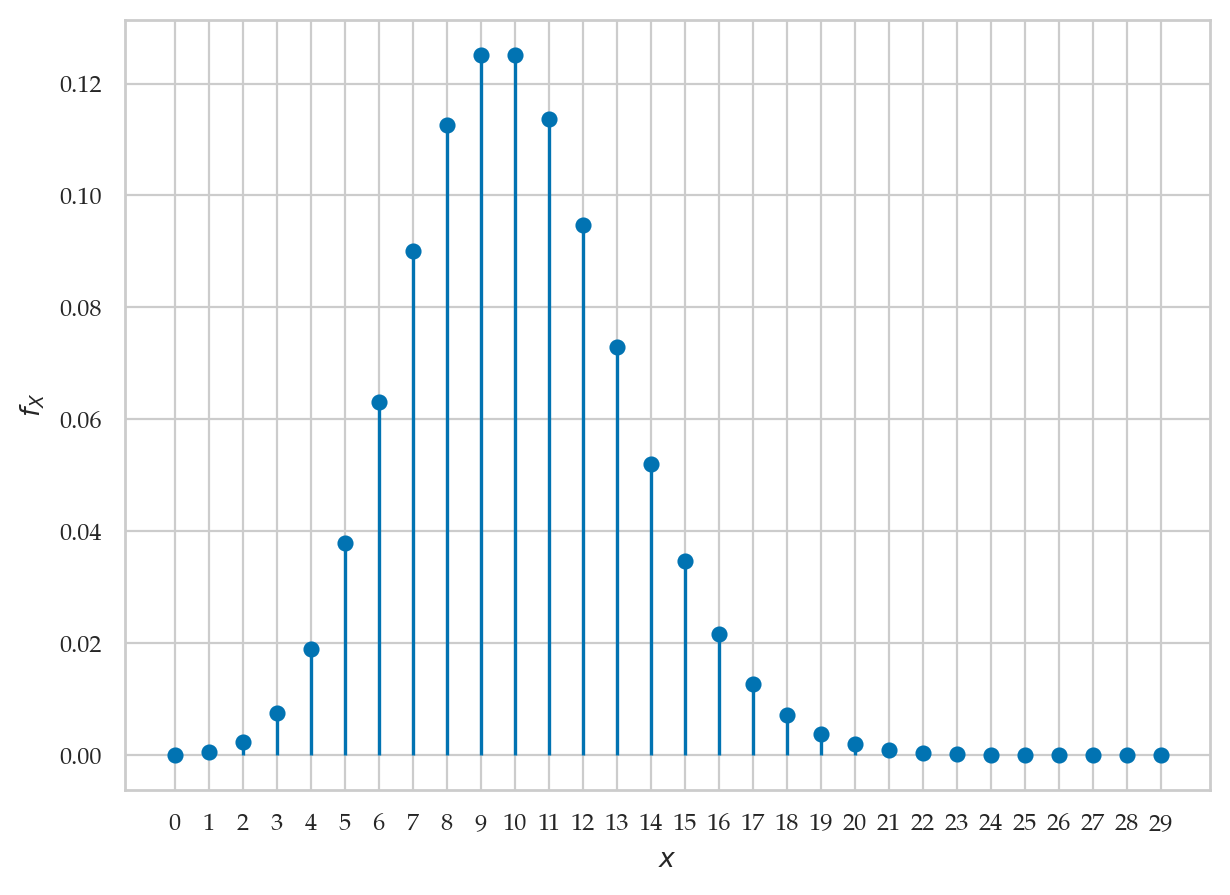

In [14]:
plot_pmf(rvP, xlims=[0,30]);

Saved figure to figures/prob/probpanels/poisson_panel.pdf
Saved figure to figures/prob/probpanels/poisson_panel.png


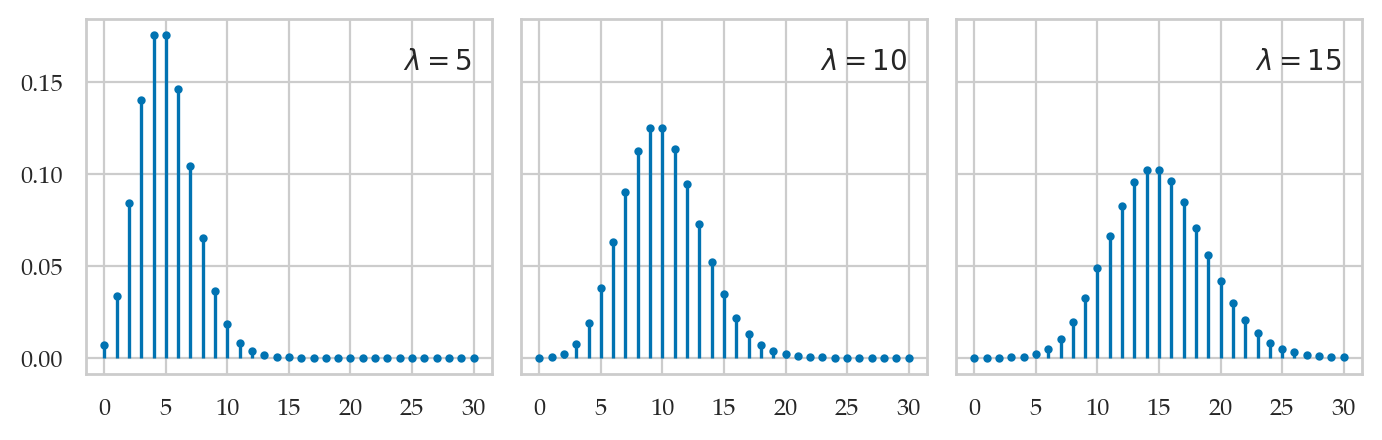

In [15]:
from scipy.stats import poisson

xmax = 31
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(mu=5),   dict(mu=10),   dict(mu=15)]
]

params_to_latex = {
    'mu': '\\lambda'
}

with plt.rc_context({"figure.figsize":(7,2.3)}):
    filename = os.path.join(DESTDIR, "poisson_panel.pdf")
    generate_pmf_panel(filename, xs, poisson, params_matrix,
                       xticks=xticks, params_to_latex=params_to_latex);

### Geometric

In [16]:
from scipy.stats import geom

rvG = geom(p = 0.2)

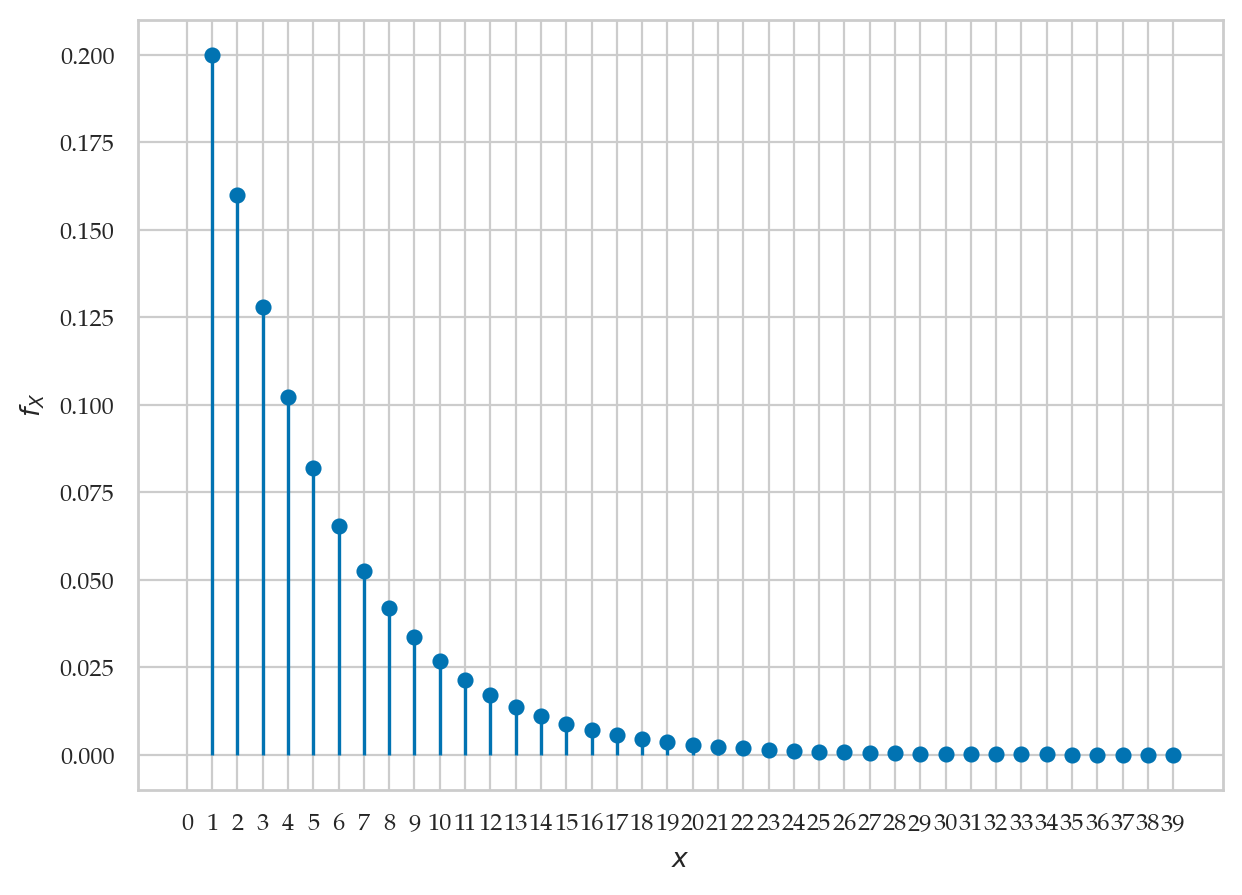

In [17]:
plot_pmf(rvG, xlims=[0,40]);

Saved figure to figures/prob/probpanels/geometric_panel.pdf
Saved figure to figures/prob/probpanels/geometric_panel.png


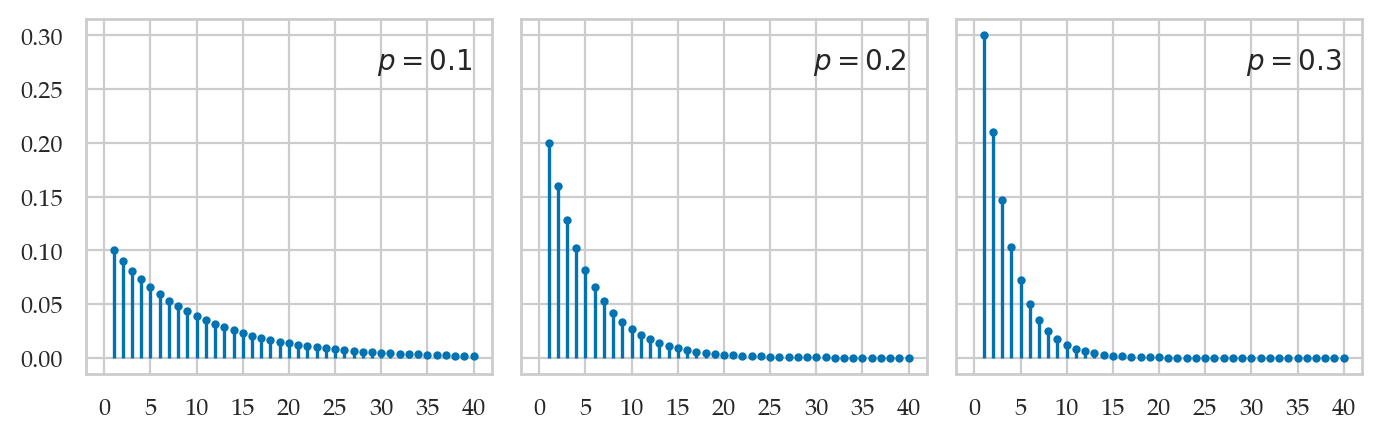

In [18]:
from scipy.stats import geom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(p=0.1),  dict(p=0.2),   dict(p=0.3)],
]

with plt.rc_context({"figure.figsize":(7,2.3)}):
    filename = os.path.join(DESTDIR, "geometric_panel.pdf")
    generate_pmf_panel(filename, xs, geom, params_matrix, xticks=xticks);

### Negative binomial

In [19]:
from scipy.stats import nbinom

r = 10
p = 0.5
rvN = nbinom(r,p)

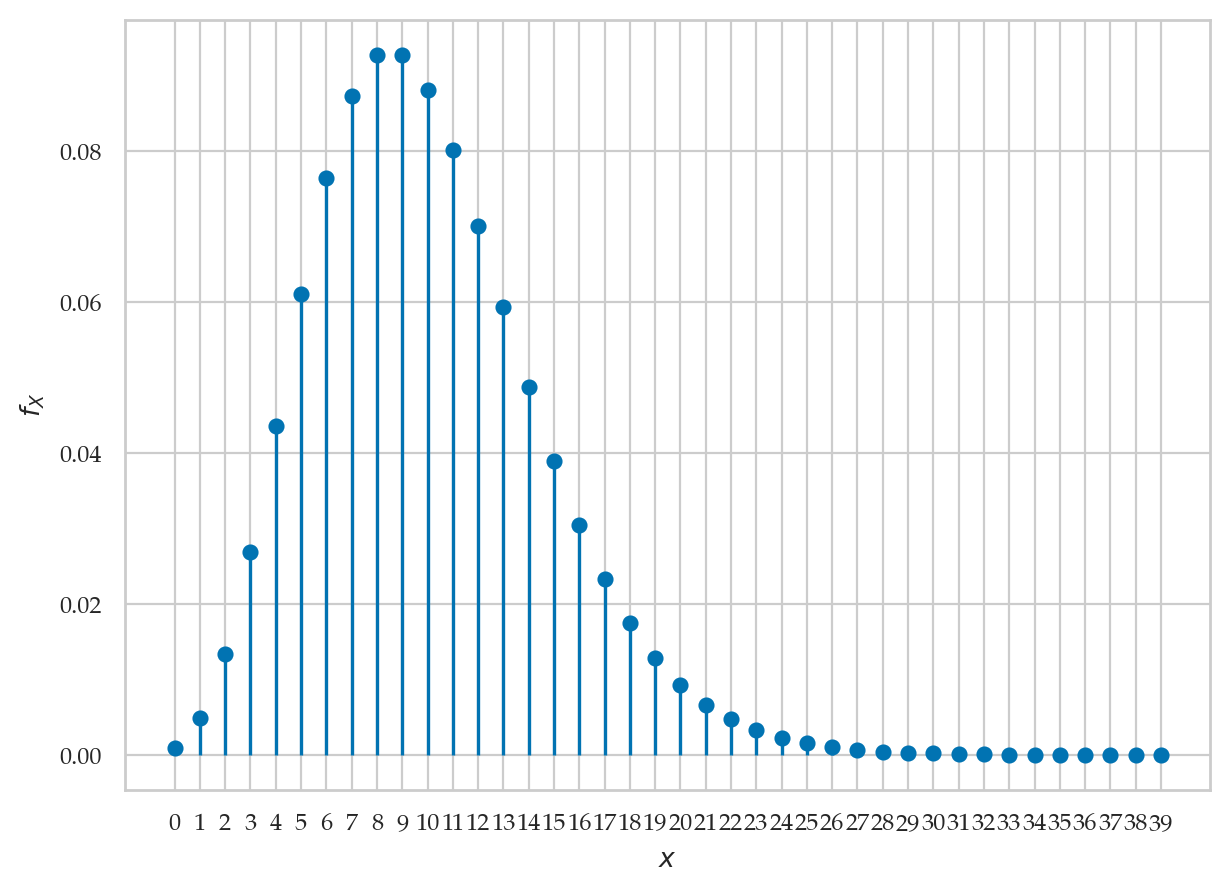

In [20]:
plot_pmf(rvN, xlims=[0,40]);

Saved figure to figures/prob/probpanels/nbinom_panel.pdf
Saved figure to figures/prob/probpanels/nbinom_panel.png


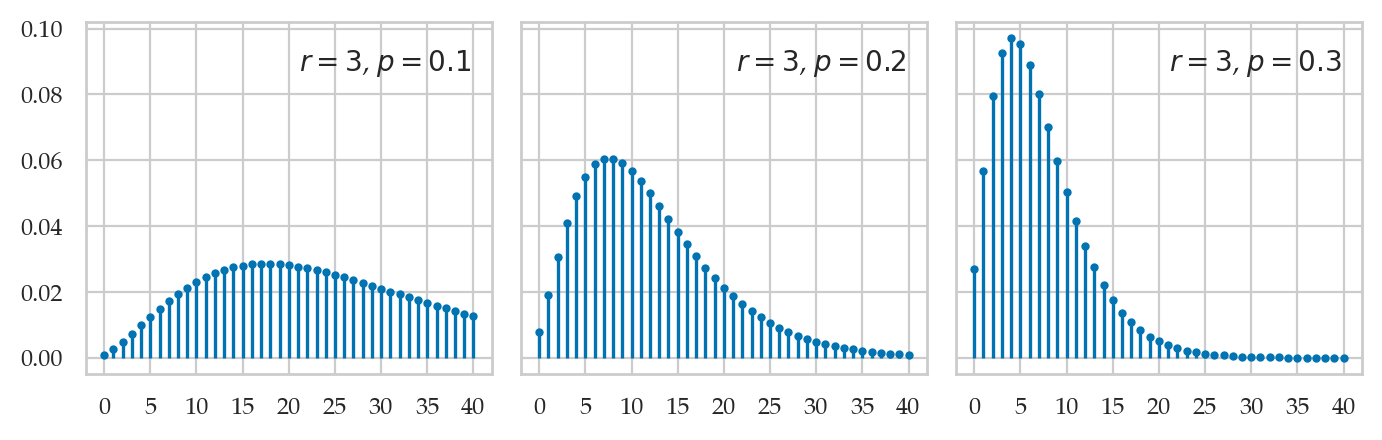

In [21]:
from scipy.stats import nbinom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=3,p=0.1), dict(n=3,p=0.2), dict(n=3,p=0.3) ],
]

with plt.rc_context({"figure.figsize":(7,2.3)}):
    filename = os.path.join(DESTDIR, "nbinom_panel.pdf")
    generate_pmf_panel(filename, xs, nbinom, params_matrix, xticks=xticks);

### Hypergeometric (CUT)

In [22]:
from scipy.stats import hypergeom

a = 30   # number of success balls
b = 40   # number of failure balls
n = 20   # how many we're drawing

rvH = hypergeom(a+b, a, n)

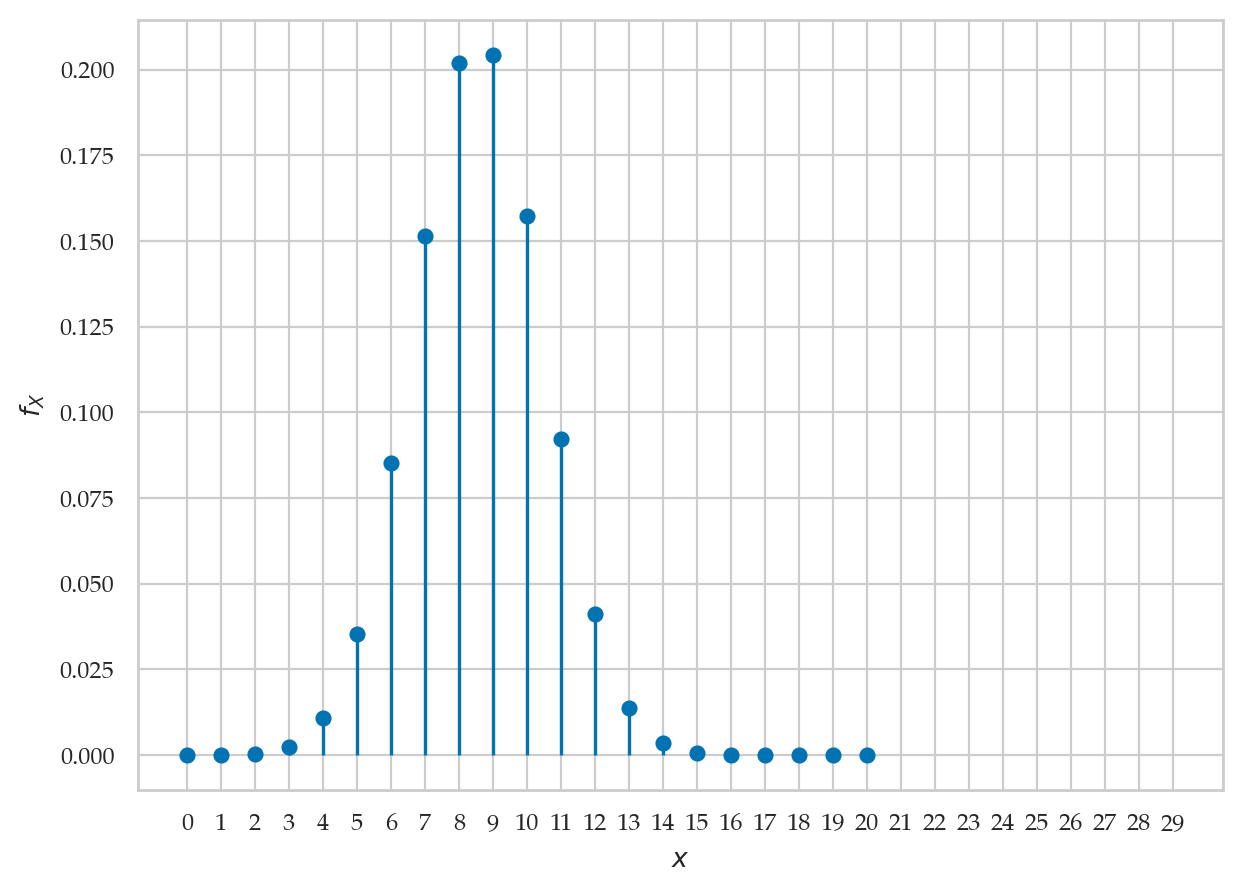

In [23]:
plot_pmf(rvH, xlims=[0,30]);

Saved figure to figures/prob/probpanels/hypergeom_panel.pdf
Saved figure to figures/prob/probpanels/hypergeom_panel.png


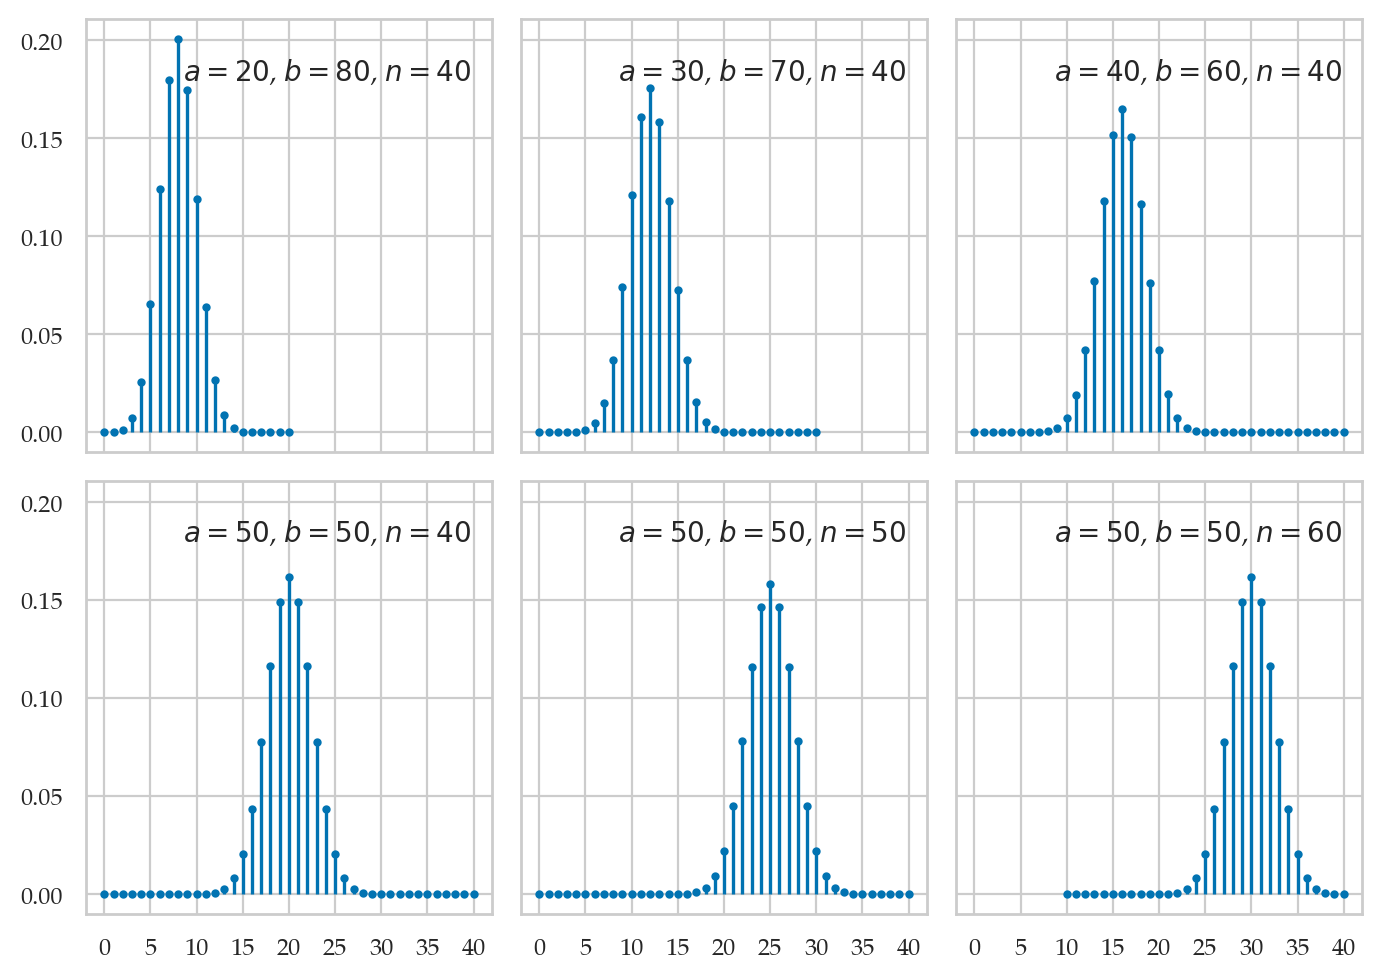

In [24]:
from scipy.stats import hypergeom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(M=100,n=20,N=40), dict(M=100,n=30,N=40), dict(M=100,n=40,N=40) ],
    [ dict(M=100,n=50,N=40), dict(M=100,n=50,N=50), dict(M=100,n=50,N=60) ],
]

filename = os.path.join(DESTDIR, "hypergeom_panel.pdf")
generate_pmf_panel(filename, xs, hypergeom, params_matrix, xticks=xticks);

##### Tomatoes salad probabilities

In [25]:
a = 3   # number of good tomatoes
b = 4   # number of rotten tomatoes
n = 2   # how many we're drawing

rvHe = hypergeom(a+b, a, n)

(np.float64(0.28571428571428575),
 np.float64(0.5714285714285715),
 np.float64(0.14285714285714288))

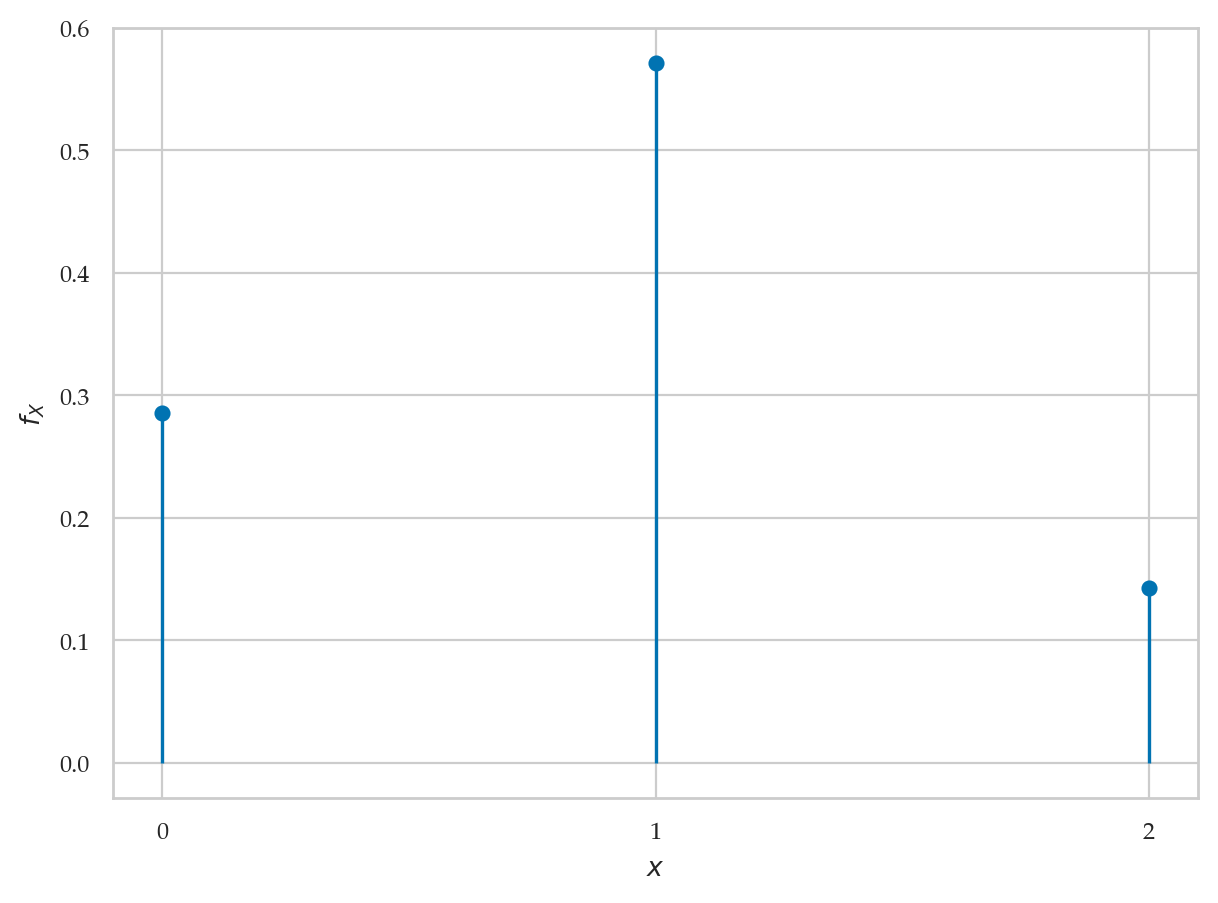

In [26]:
plot_pmf(rvHe, xlims=[0,3]);

rvHe.pmf(0), rvHe.pmf(1), rvHe.pmf(2)

##### Number of dogs seen by Amy

In [27]:
a = 7        # number dogs
b = 20 - 7   # number of other animals
n = 12       # how many "patients" Amy will see today

rvD = hypergeom(a+b, a, n)

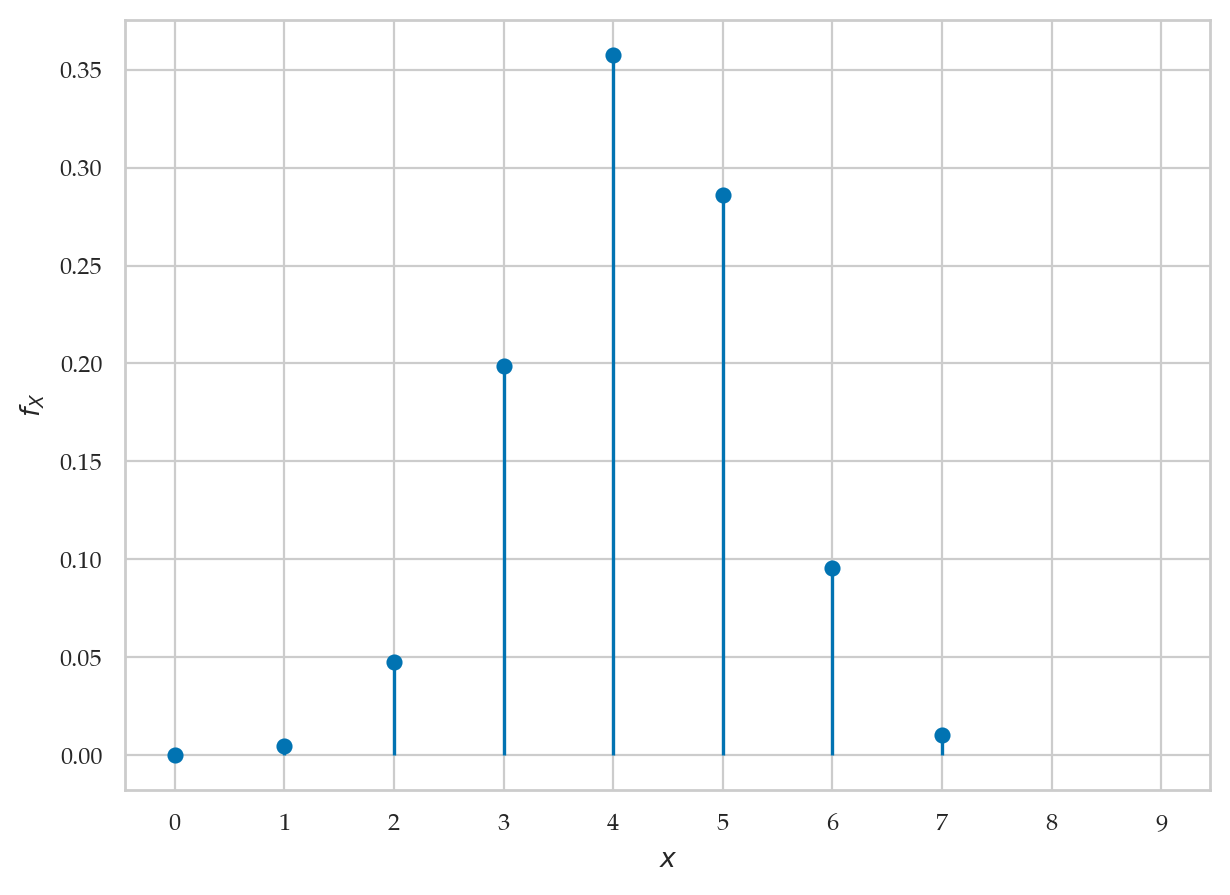

In [28]:
plot_pmf(rvD, xlims=[0,10]);

### Multinomial (CUT)

See [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html).

In [29]:
from scipy.stats import multinomial

n = 10
ps = [0.1, 0.5, 0.8]

rvM = multinomial(n,ps)

In [30]:
# TODO: 3D scatter plot of points in space

## Computer models for discrete distributions

TODO table models

TODO table methods

In [31]:
DESTDIR = "figures/prob/discreteinventory"  # where to save figures

### Building computer models for random variables

In [32]:
# import the model family
from scipy.stats import randint

# choose parameters
alpha = 1  # start at 1
beta = 4   # stop at 4

# create the rv object
rvR = randint(alpha, beta+1)

### Plotting distributions

Saved figure to figures/prob/discreteinventory/plot_pmf_rvR_1_to_4.pdf
Saved figure to figures/prob/discreteinventory/plot_pmf_rvR_1_to_4.png


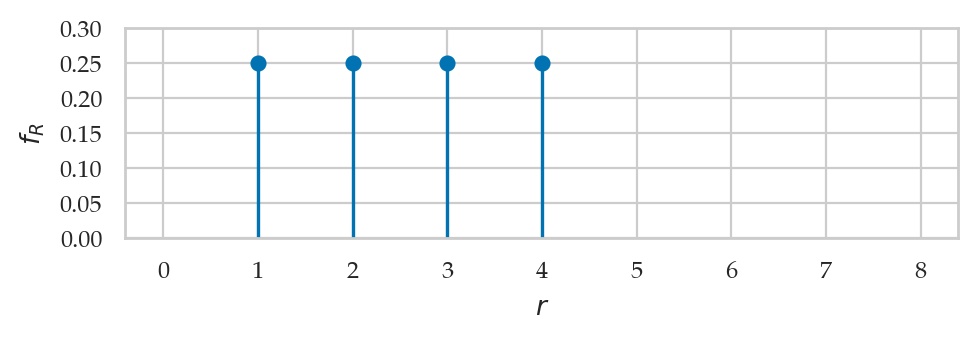

In [33]:
with plt.rc_context({"figure.figsize":(5,1.8)}):
    ax = plot_pmf(rvR, xlims=[0,8+1], ylims=[0,0.3], rv_name="R")
    ax.set_yticks(np.linspace(0,0.3,7))
    filename = os.path.join(DESTDIR, "plot_pmf_rvR_1_to_4.pdf")
    savefigure(ax, filename)

#### Cumulative distribution function

Saved figure to figures/prob/discreteinventory/plot_CDF_rvR_1_to_4.pdf
Saved figure to figures/prob/discreteinventory/plot_CDF_rvR_1_to_4.png


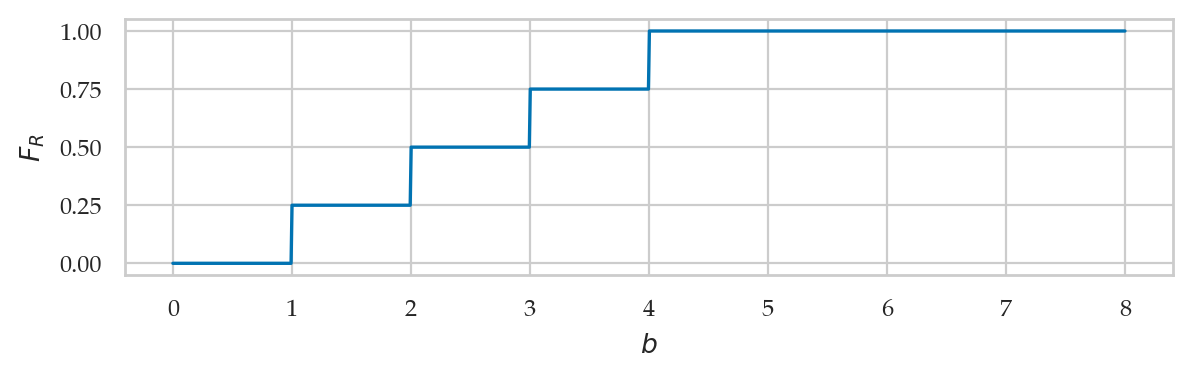

In [34]:
with plt.rc_context({"figure.figsize":(6,2)}):
    ax = plot_cdf(rvR, xlims=[0,8], rv_name="R")
    filename = os.path.join(DESTDIR, "plot_CDF_rvR_1_to_4.pdf")
    savefigure(ax, filename)

## Discussion